In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
customers = pd.read_csv(r"C:\Users\Ravi\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\Ravi\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\Ravi\Downloads\Transactions.csv")

In [8]:
# Basic EDA
print(customers.head())
print(products.head())
print(transactions.head(),"\n")

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [9]:
# Basic Dataset Information
print("Products Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())
print("\nCustomers Dataset Info:")
print(customers.info())

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2)

In [10]:
# Generating summary statistics for each dataset
print("\nCustomers Dataset:")
print(customers.describe(include='all'))
print("\nProducts Dataset:")
print(products.describe(include='all'))
print("\nTransactions Dataset:")
print(transactions.describe(include='all'))

# Unique values in categorical columns
print(customers['Region'].value_counts())
print(products['Category'].value_counts())


Customers Dataset:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Dataset:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    

In [11]:
# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Display merged dataset
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [12]:
# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Display merged dataset
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [22]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Check merged data
print(merged_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [14]:
# Checking for missing values
print("\nMissing values in Products dataset:")
print(products.isnull().sum())
print("\nMissing values in Customers dataset:")
print(customers.isnull().sum())
print("\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())


Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Insights and Visualization


            TotalSpent  AvgTransactionValue  TransactionCount
CustomerID                                                   
C0141         10673.87          1067.387000                10
C0054          8040.39          1005.048750                 8
C0065          7663.70           766.370000                10
C0156          7634.45           694.040909                11
C0082          7572.91          1081.844286                 7
C0188          7111.32           888.915000                 8
C0059          7073.28           884.160000                 8
C0028          6819.57           852.446250                 8
C0099          6715.72           839.465000                 8
C0165          6708.10           745.344444                 9


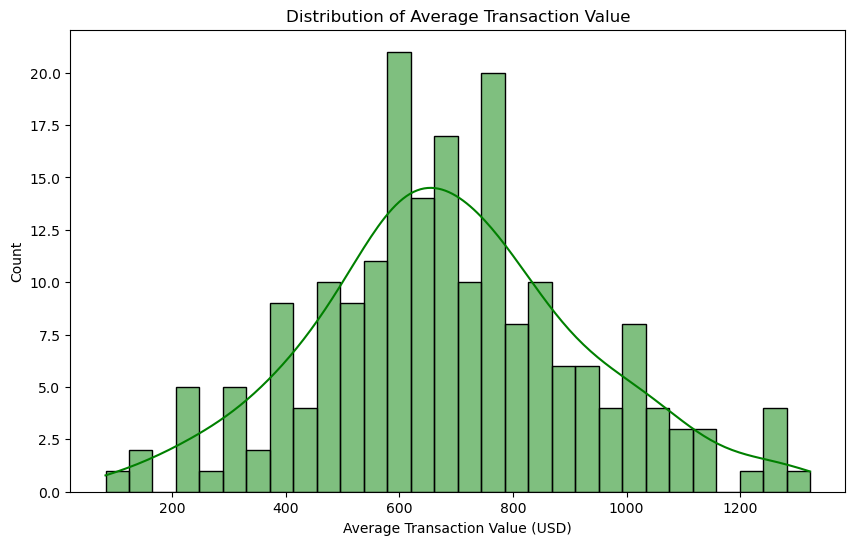

In [18]:
# Total and average spending per customer
customer_behavior = merged_data.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    AvgTransactionValue=('TotalValue', 'mean'),
    TransactionCount=('TransactionID', 'count')
).sort_values(by='TotalSpent', ascending=False)

print(customer_behavior.head(10))

# Plot average transaction value
plt.figure(figsize=(10, 6))
sns.histplot(customer_behavior['AvgTransactionValue'], bins=30, kde=True, color='green')
plt.title("Distribution of Average Transaction Value")
plt.xlabel("Average Transaction Value (USD)")
plt.show()

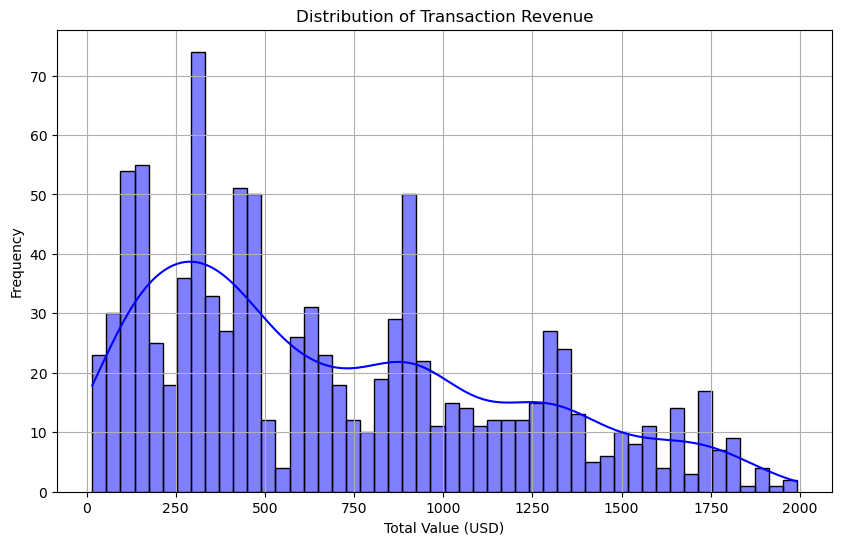

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalValue'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Revenue")
plt.xlabel("Total Value (USD)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

C:\Users\Ravi\AppData\Local\Temp\ipykernel_6912\4035025937.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")


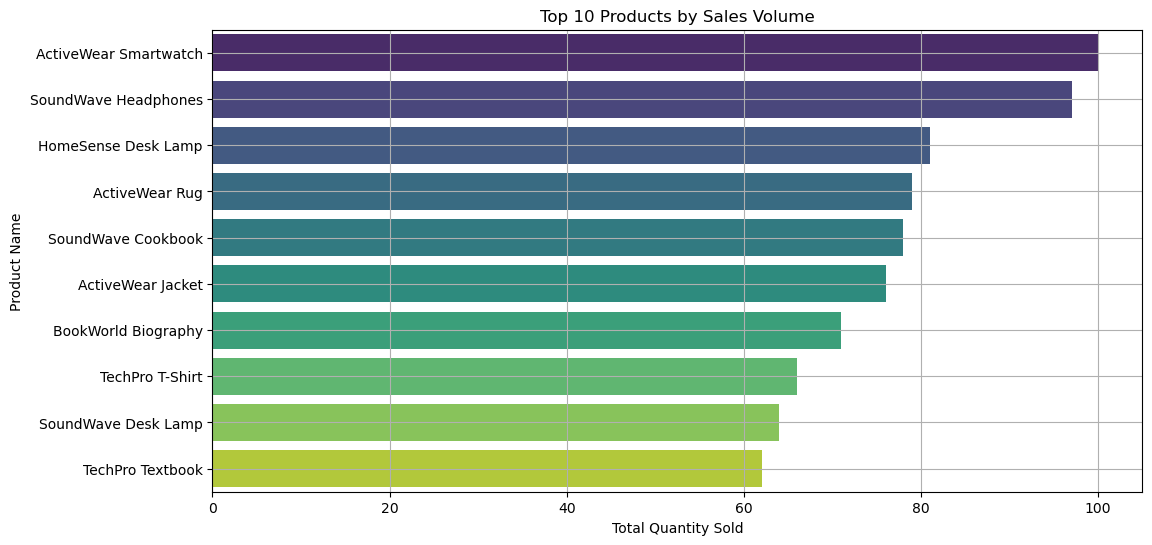

In [24]:
product_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")
plt.title("Top 10 Products by Sales Volume")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.grid()
plt.show()


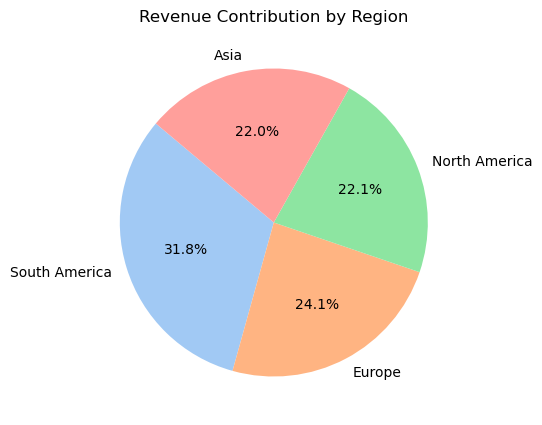

In [25]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
region_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Revenue Contribution by Region")
plt.ylabel("")
plt.show()


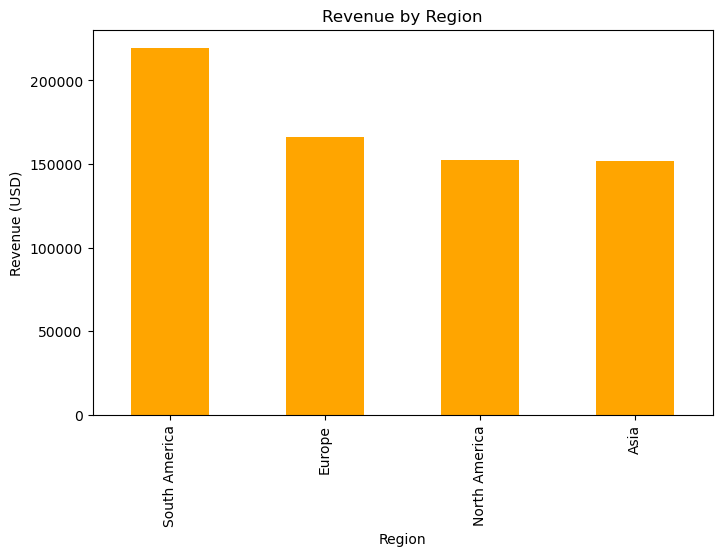

In [27]:
# Revenue by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plot revenue by region
region_revenue.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Revenue by Region")
plt.ylabel("Revenue (USD)")
plt.show()

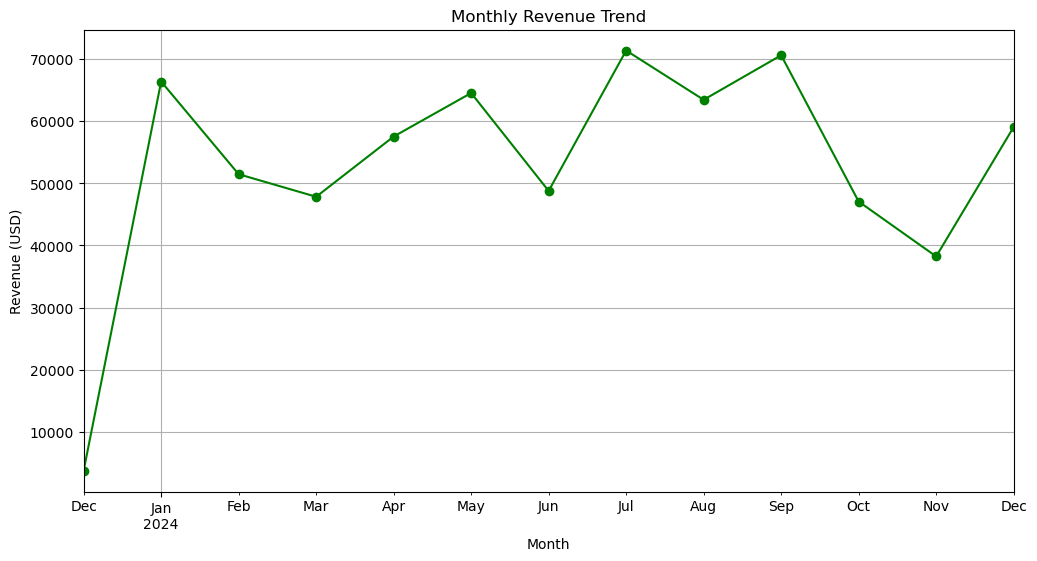

In [28]:
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('TransactionMonth')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (USD)")
plt.grid()
plt.show()

C:\Users\Ravi\AppData\Local\Temp\ipykernel_6912\2576760569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")


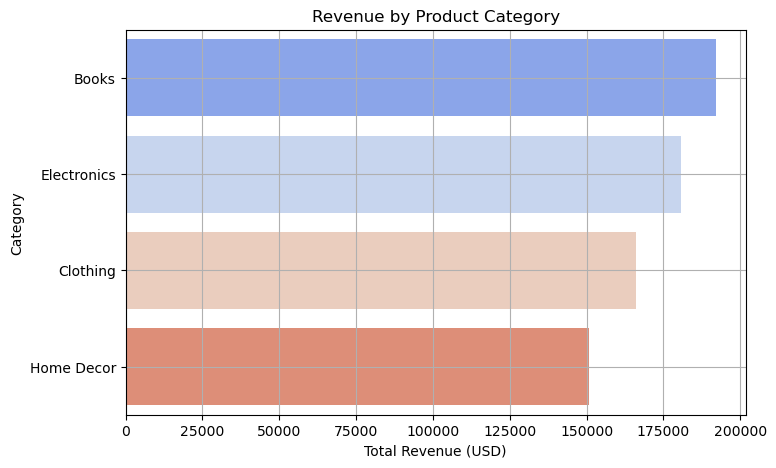

In [29]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.grid()
plt.show()

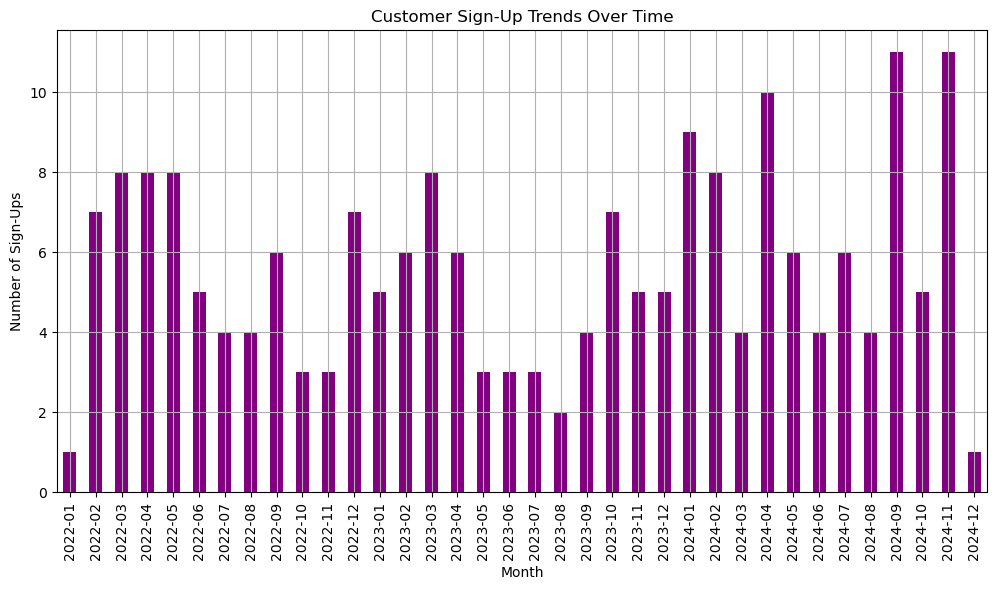

In [30]:
signup_trend = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
signup_trend.plot(kind='bar', color='purple')
plt.title("Customer Sign-Up Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Sign-Ups")
plt.grid()
plt.show()


C:\Users\Ravi\AppData\Local\Temp\ipykernel_6912\944476598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="mako")


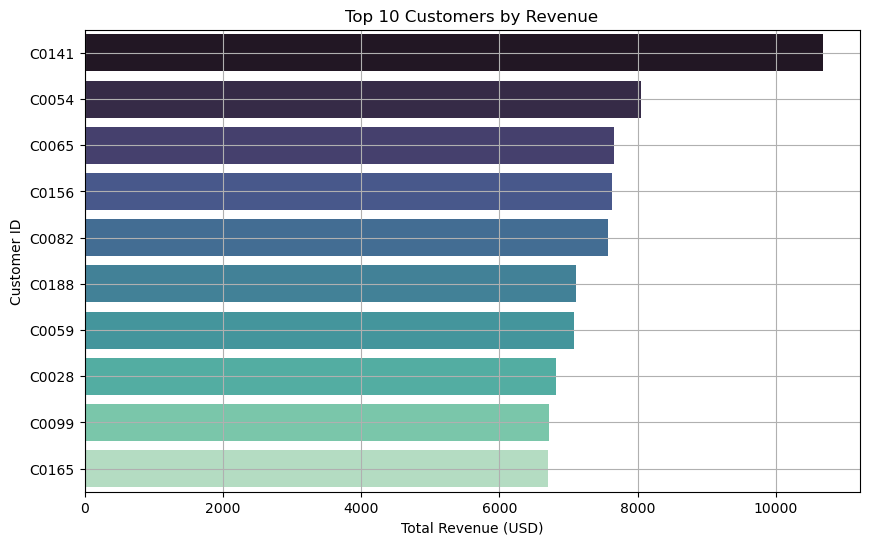

In [31]:
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="mako")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Customer ID")
plt.grid()
plt.show()